# Case Study: MNIST Digits

The MNIST dataset is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. 

## Load Dataset

In [36]:
import numpy as np
from os.path import join
from myutils.config import config
from mlxtend.data import loadlocal_mnist


data_root = join(config['data_dir'], 'digits v2')
X_train, y_train = loadlocal_mnist(images_path=join(data_root, 'train-images.idx3-ubyte'), 
                                   labels_path=join(data_root, 'train-labels.idx1-ubyte'))
X_test, y_test = loadlocal_mnist(images_path=join(data_root, 't10k-images.idx3-ubyte'), 
                                 labels_path=join(data_root, 't10k-labels.idx1-ubyte'))


# shuffle using fixed permutation set because the data is already seperated.
# note: using np.shuffle would disorientate the direct mapping between training and test set.
shuffle_index_train = np.random.permutation(X_train.shape[0])
shuffle_index_test = np.random.permutation(X_test.shape[0])

X_train, y_train = X_train[shuffle_index_train], y_train[shuffle_index_train]
X_test, y_test = X_test[shuffle_index_test], y_test[shuffle_index_test]

## Data Transformation

In [37]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

## EDA

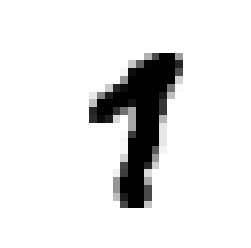

true label:  1


In [38]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


# view some digit
rand_im_i = 36000
some_digit = X_train[rand_im_i]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

print('true label: ', y_train[rand_im_i])

## Machine Learners

### SGDClassifier

In [39]:
from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier(max_iter=550, tol=1e-3)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([9], dtype=uint8)

We can prove that SGDClassifer will automatically detect a multiclassification problem and perform OvsR internally. In otherwords, 10 different binary classifers were made and the decision_function for most "confident" classifier was selected.

In [40]:
binary_decision_scores = sgd_clf.decision_function([some_digit])

# index of highest binary classifier decision function, which in our case convieniently 
# also maps as the class itself, we would other use the classes_ attribute.
np.argmax(binary_decision_scores)

9

In [41]:
from sklearn.model_selection import cross_val_score


cross_val_score(sgd_clf, X_test, y_test, cv=3, scoring="accuracy")

array([0.88016777, 0.86528653, 0.87053169])

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier


forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([1], dtype=uint8)

In [43]:
class_probabilities = forest_clf.predict_proba([some_digit])
np.argmax(class_probabilities)

1

In [56]:
cross_val_score(forest_clf, X_test, y_test, cv=3, scoring="accuracy")

array([0.94997004, 0.95109511, 0.94863322])

## Evaluation

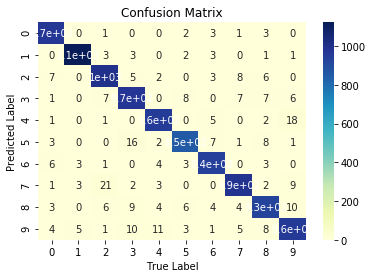

In [55]:
from myutils.draw.category import confusion_grid


y_pred = forest_clf.predict(X_test)
confusion_grid(y_test, y_pred, list(range(10)))

Looks like 7 and 2 share similiar representative attributes. Lets take a look at these individually.

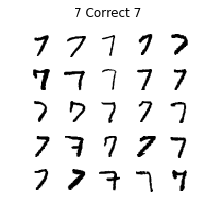

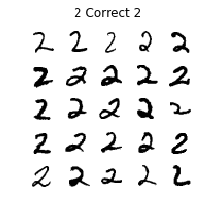

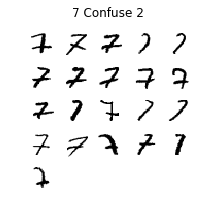

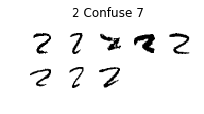

In [65]:
def plot_digits(digits, im_per_row, im_per_col, title):
    plt.figure(figsize=(3,3))
    for i, digit in enumerate(digits, 1):
        plt.subplot(im_per_row, im_per_col, i)
        digit = digit.reshape(28, 28)
        plt.imshow(digit, cmap=matplotlib.cm.binary, interpolation="nearest")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()


cl_7, cl_2 = 7, 2
X_7_correct = X_test[(y_test == cl_7) & (y_pred == cl_7)]
X_2_correct = X_test[(y_test == cl_2) & (y_pred == cl_2)]

X_7_confuse_2 = X_test[(y_test == cl_7) & (y_pred == cl_2)]
X_2_confuse_7 = X_test[(y_test == cl_2) & (y_pred == cl_7)]


plot_digits(X_7_correct[:25], im_per_row=5, im_per_col=5, title='7 Correct 7')
plot_digits(X_2_correct[:25], im_per_row=5, im_per_col=5, title='2 Correct 2')
plot_digits(X_7_confuse_2[:25], im_per_row=5, im_per_col=5, title='7 Confuse 2')
plot_digits(X_2_confuse_7[:25], im_per_row=5, im_per_col=5, title='2 Confuse 7')